### Para sacar los datos del .sto y pasarlos a .csv

In [2]:
import pandas as pd
import numpy as np
import os
from IPython import embed
import matplotlib.pyplot as plt

# Ruta del archivo de resultados de OpenSim
results_file = 'C:\\OpenSim\\4.5\\Models\\Leg6Dof9Musc\\ultimo\\9musc\\leg6dof9musc_states.sto'

# Leer el archivo, saltando el encabezado no deseado
with open(results_file, 'r') as f:
    lines = f.readlines()

# Encontrar la línea donde empiezan los datos
start_line = next(i for i, line in enumerate(lines) if line.startswith('endheader')) + 1

# Leer los datos desde esa línea en adelante
columns = lines[start_line].strip().split('\t')
data = pd.read_csv(results_file, delim_whitespace=True, skiprows=start_line + 1, names=columns)

# Seleccionar columnas relevantes
muscles = ['bifemlh_r', 'bifemsh_r', 'rect_fem_r', 'vas_int_r', 'med_gas_r']
activation_cols = [f'/forceset/{m}/activation' for m in muscles]
angle_col = '/jointset/knee_r/knee_angle_r/value'
speed_col = '/jointset/knee_r/knee_angle_r/speed'

activations = data[activation_cols]
knee_angle = data[angle_col]
knee_speed = data[speed_col]
time = data['time']

# Guardar en CSV
activations.to_csv('activations.csv', index=False)
knee_angle.to_csv('knee_angle.csv', index=False)
knee_speed.to_csv('knee_speed.csv', index=False)
time.to_csv('time.csv', index=False)

print("Ángulo, velocidad y tiempo de la rodilla guardados como CSV en el directorio actual.")

C:\Users\Lucía\AppData\Local\Temp\ipykernel_16212\3591049393.py:19: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(results_file, delim_whitespace=True, skiprows=start_line + 1, names=columns)


Ángulo, velocidad y tiempo de la rodilla guardados como CSV en el directorio actual.


### Esto es la trayectoria que debería seguir (son los ángulos que le meto a cada instante)

C:\Users\Lucía\AppData\Local\Temp\ipykernel_16212\3024962920.py:18: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, skiprows=start_line + 1, names=column_names)


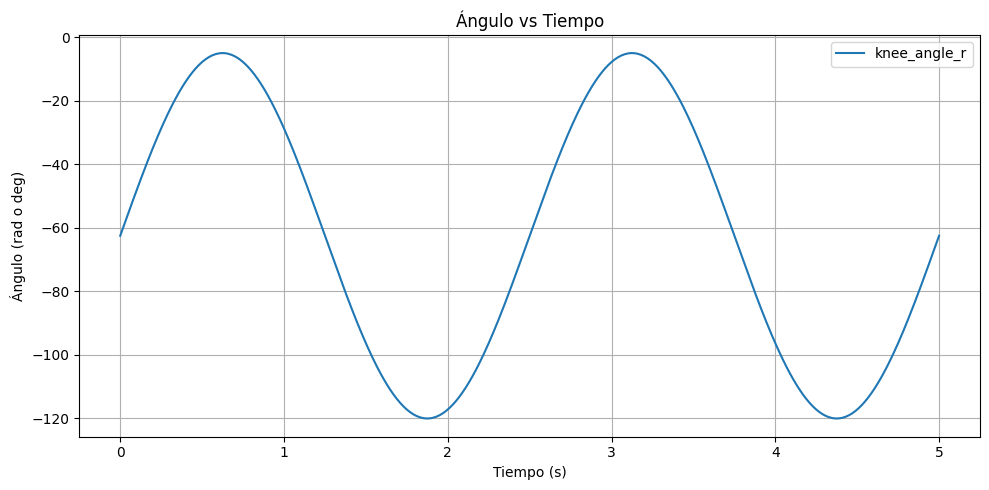

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Ruta del archivo .mot
file_path = 'C:\\OpenSim\\4.5\\Models\\Leg6Dof9Musc\\NEW\\rodilla_angulos_suave.mot'

# Leer el archivo .mot
with open(file_path, 'r') as f:
    lines = f.readlines()

# Buscar dónde empieza la cabecera de los datos
start_line = next(i for i, line in enumerate(lines) if line.strip().startswith('endheader')) + 1

# Leer los nombres de las columnas (debería ser justo después de endheader)
column_names = lines[start_line].strip().split()

# Cargar los datos con pandas
data = pd.read_csv(file_path, delim_whitespace=True, skiprows=start_line + 1, names=column_names)

# Verifica que las columnas correctas existen
if 'time' not in data.columns or len(data.columns) < 2:
    raise ValueError("El archivo debe tener una columna 'time' y otra de ángulos")

# Obtener la columna de ángulo (la segunda columna)
angle_col = data.columns[1]

# Graficar
plt.figure(figsize=(10, 5))
plt.plot(data['time'], data[angle_col], label=angle_col)
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (rad o deg)')
plt.title('Ángulo vs Tiempo')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### Para ver la velocidad y posición de rodilla

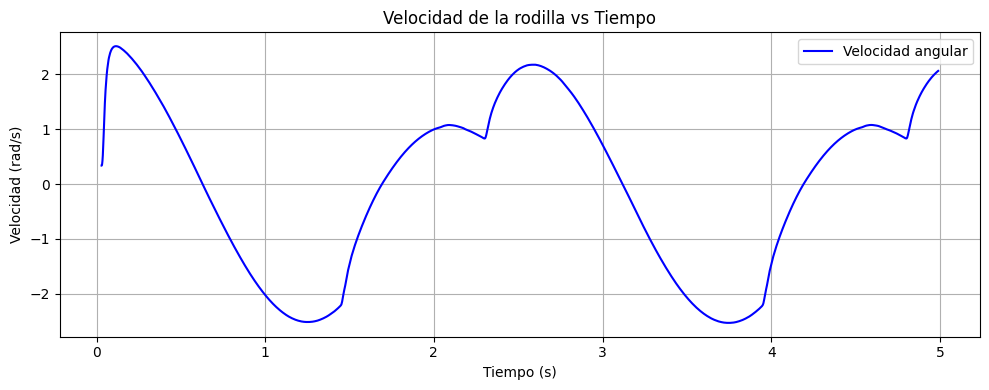

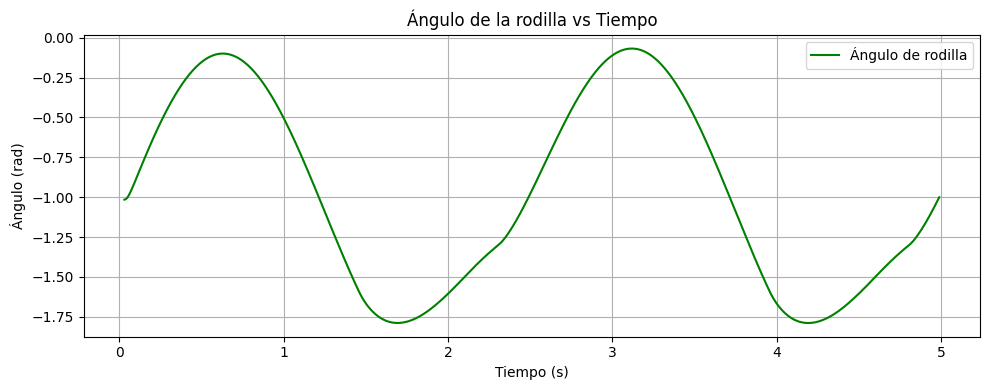

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Rutas de los archivos CSV 
time_file = 'F:\\OPENSIM\\time.csv'
angle_file = 'F:\\OPENSIM\\knee_angle.csv'
speed_file = 'F:\\OPENSIM\\knee_speed.csv'

# Leer los archivos
df_time = pd.read_csv(time_file)
df_angle = pd.read_csv(angle_file)
df_speed = pd.read_csv(speed_file)

# Asegurarse de que cada archivo tenga una sola columna
if df_time.shape[1] != 1 or df_angle.shape[1] != 1 or df_speed.shape[1] != 1:
    raise ValueError("Cada archivo debe tener exactamente una columna.")

# Extraer los datos como Series
time = df_time.iloc[:, 0]
angle = df_angle.iloc[:, 0]
speed = df_speed.iloc[:, 0]

# Verificar que tengan la misma longitud
if not (len(time) == len(angle) == len(speed)):
    raise ValueError("Los archivos no tienen la misma cantidad de filas.")

# Gráfica 1: Velocidad vs Tiempo
plt.figure(figsize=(10, 4))
plt.plot(time, speed, label='Velocidad angular', color='blue')
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad (rad/s)')
plt.title('Velocidad de la rodilla vs Tiempo')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Gráfica 2: Ángulo vs Tiempo
plt.figure(figsize=(10, 4))
plt.plot(time, angle, label='Ángulo de rodilla', color='green')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (rad)')
plt.title('Ángulo de la rodilla vs Tiempo')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## Para ver activaciones de todos los músculos

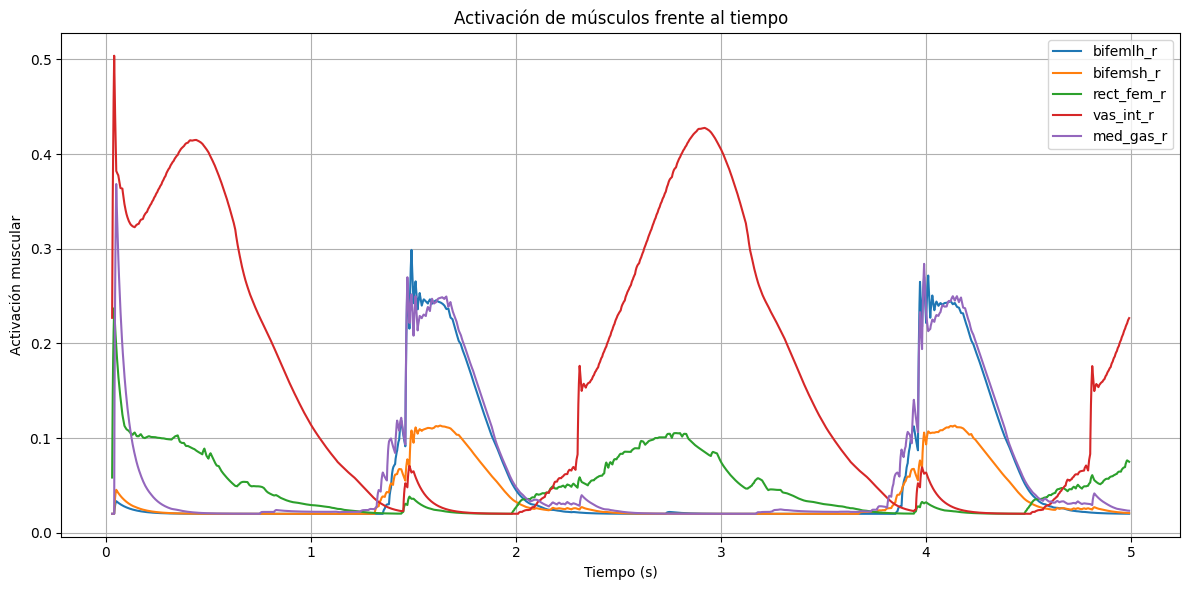

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Rutas a los archivos
activations_file = 'F:\\OPENSIM\\activations.csv' 
time_file = 'F:\\OPENSIM\\time.csv'               

# Leer archivos
df_activations = pd.read_csv(activations_file)
df_time = pd.read_csv(time_file)

# Validar estructura
if df_time.shape[1] != 1:
    raise ValueError("El archivo de tiempo debe tener solo una columna")

# Extraer tiempo como Series
time = df_time.iloc[:, 0]

# Verificar que tengan la misma longitud
if len(time) != len(df_activations):
    raise ValueError("Los archivos de tiempo y activaciones no tienen el mismo número de filas.")

# Diccionario de activaciones musculares
activations = {
    'bifemlh_r': df_activations['/forceset/bifemlh_r/activation'],
    'bifemsh_r': df_activations['/forceset/bifemsh_r/activation'],
    'rect_fem_r': df_activations['/forceset/rect_fem_r/activation'],
    'vas_int_r': df_activations['/forceset/vas_int_r/activation'],
    'med_gas_r': df_activations['/forceset/med_gas_r/activation']
}

# Graficar todas las activaciones
plt.figure(figsize=(12, 6))
for muscle, values in activations.items():
    plt.plot(time, values, label=muscle)

plt.xlabel('Tiempo (s)')
plt.ylabel('Activación muscular')
plt.title('Activación de músculos frente al tiempo')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
